# 信用风险评级模型的类别

- A卡，又称为申请者评级模型，主要应用于相关融资类业务中新用户的主体评级，适用于个人和机构融资主体。
- B卡，又称为行为评级模型，主要应用于相关融资类业务中存量客户在续存期内的管理，如对客户可能出现的逾期、延期等行为进行预测，仅适用于个人融资主体。
- C卡，又称为催收评级模型，主要应用于相关融资类业务中存量客户是否需要催收的预测管理，仅适用于个人融资主体。
- F卡，又称为欺诈评级模型，主要应用于相关融资类业务中新客户可能存在的欺诈行为的预测管理，适用于个人和机构融资主体。 

# 信用风险评级模型开发流程概述

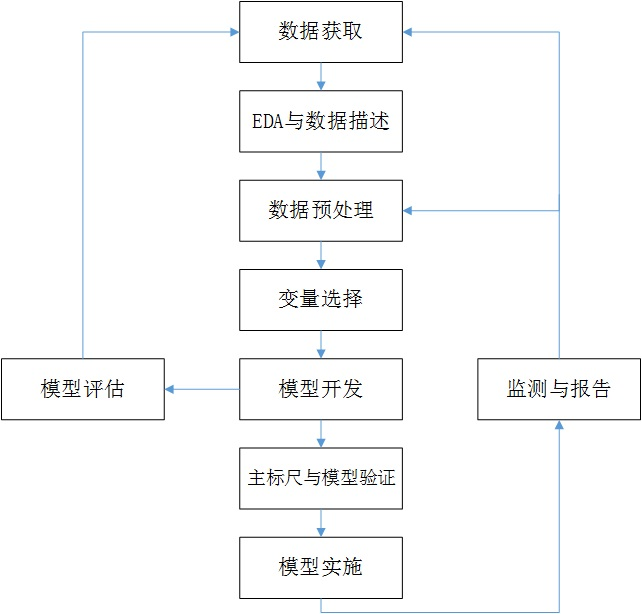

In [1]:
from IPython.display import Image
Image(filename="images/developerFlow.jpg")

# 基于逻辑回归的标准评分卡模型开发实现

## 明确要解决的问题

申请者评分模型需要解决的问题是未来一段时间（如12个月）融资人出现违约（如至少一次90天或90天以上逾期）的概率。

个人主体的违约跟个人行为习惯有很大的相关性，因此我们可以通过分析个人样本总体中客户的历史违约频率来确定表现时间窗口和观察时间窗口

## 数据描述和探索性数据分析

In [6]:
import pandas as pd

data_train = pd.read_csv("input/german_credit.csv")
data_train.iloc[:5, :]

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [10]:
data_train.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


GermanCredit数据集的定量和定性指标

定量指标
- Duration of Credit(贷款期限)
- Credit Amount(赊帐金额)
- Instalment per cent(分期利率)
- Sex & Marital Status(婚姻状况)
- Duration in Current address(现址居住时间)
- Age (年龄)

定性指标
- Payment Status of Previous Credit(以前信用的付款状况)
- Purpose(资金用途)
- Value Savings/Stocks(储蓄情况)
- Length of current employment(工作年限)
- Guarantors(保证人)
- Most valuable available asset(提供最有价值的资产)
- Type of apartment(住房情况)
- Occupation(职业)
- Telephone(是否有电话)
- Foreign Worker(是否外籍工作者)
- Account Balance(账户结余)
- Concurrent Credits()
- No of Credits at this Bank(信用卡数量)
- No of dependents(公寓数)

违约状况指标
- Creditability(是否发生了违约)

## 数据集准备

## 变量筛选

## WOE值计算

## 基于逻辑回归的标准评分卡实现

## 主标尺设计及模型验证

## 模型实施

## 模型监测与报告